<a href="https://colab.research.google.com/github/LQDJerry/MachLearn/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Import data from csv files

In [128]:
train =  pd.read_csv("https://github.com/LQDJerry/MachLearn/raw/main/TitanicTrain.csv")
test = pd.read_csv("https://github.com/LQDJerry/MachLearn/raw/main/TitanicTest.csv")
gSub = pd.read_csv("https://github.com/LQDJerry/MachLearn/raw/main/gender_submission.csv")

Print info from imported data

In [129]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [130]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Saether, Mr. Simon Sivertsen",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [131]:
gSub.describe(include='all')

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


Mapping Sex to 0 an 1

In [132]:
train["Sex"] = train_data["Sex"].map({"male":0,"female":1})
test["Sex"] = test_data["Sex"].map({"male":0,"female":1})

In [133]:
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])


Dropping Certain Characteristics

Here I had various characteristics dropped for different tests to see how the accuracy would change depending on the feature that was present or not.

To change the test, re-run the code from the begining and uncomment/comment out which test you want to run

In [134]:
#this test characteristics without Name, Cabin, and Ticket info  -- TEST A
#train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
#test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

#this test characteristics without Embarked, Name, Cabin, and Ticket info -- TEST B
#train.drop([ 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
#test.drop([ 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

#this test characteristics with only Age and Sex -- TEST C
train.drop(['Pclass','SibSp', 'Parch', 'Fare' ,'Embarked_C', 'Embarked_Q', 'Embarked_S','Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop([ 'Pclass','SibSp', 'Parch', 'Fare','Embarked_C', 'Embarked_Q', 'Embarked_S','Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

Printing out new Data

In [135]:
train

,PassengerId,Survived,Sex,Age
0,1,0,0,22.0
1,2,1,1,38.0
2,3,1,1,26.0
3,4,1,1,35.0
4,5,0,0,35.0
...,...,...,...,...
886,887,0,0,27.0
887,888,1,1,19.0
888,889,0,1,NaN
889,890,1,0,26.0


In [136]:
test

,PassengerId,Sex,Age
0,892,0,34.5
1,893,1,47.0
2,894,0,62.0
3,895,0,27.0
4,896,1,22.0
...,...,...,...
413,1305,0,NaN
414,1306,1,39.0
415,1307,0,38.5
416,1308,0,NaN


To change the test, re-run the code from the begining and uncomment/comment out which test you want to run

In [137]:
target = train["Survived"]
#this test characteristics without Name, Cabin, and Ticket info -- TEST A
#charData = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

#this test characteristics without Embarked, Name, Cabin, and Ticket info -- TEST B
#charData = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

#this test characteristics with only Age and Sex -- TEST C
charData = ["Sex", "Age"]

trainDummies = pd.get_dummies(train[charData])
testDummies = pd.get_dummies(test[charData])

imputer = SimpleImputer()
trainDummies = imputer.fit_transform(trainDummies)
testDummies = imputer.fit_transform(testDummies)

trainx, testx, trainy, testy = train_test_split(trainDummies, target, test_size=0.33, random_state=10)

Use classifier and find model accuracy

In [138]:
clf = MLPClassifier(hidden_layer_sizes= (50,),max_iter=50000, activation='logistic', solver= 'lbfgs', random_state=1).fit(trainx, trainy)
model_accuracy = clf.score(testx, testy)
model_accuracy

0.8

Prepare submission

In [139]:
ID = test['PassengerId']
predictions = clf.predict(testDummies)
result = pd.DataFrame({ 'PassengerId' : ID, 'Survived': predictions})
result.to_csv('titanicSubmission.csv', index = False)
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


The submisision below was the result of TEST A which tested characteristics without Name, Cabin, and Ticket info. This yielded a 70% score. 

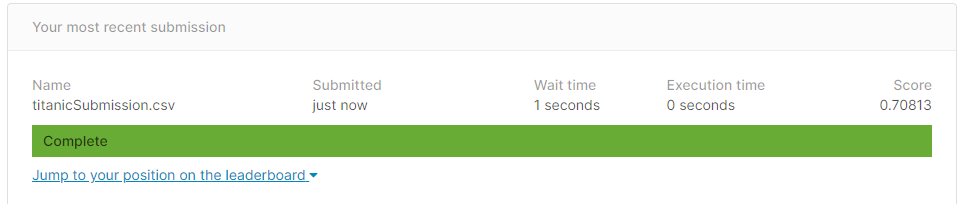

The submisision below was the result of TEST C which tested characteristics with only Age and Sex info. This yielded a 75% score. 

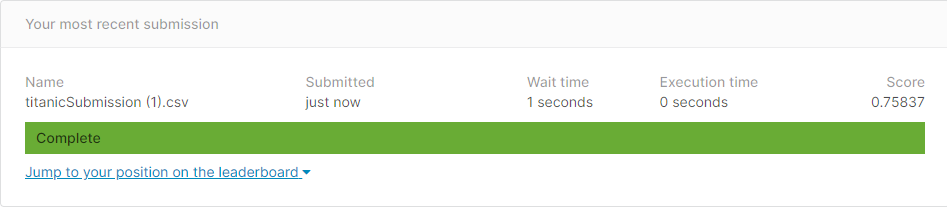

# **Colcusion**

I got a higher score when I only used Age and Sex as tested characteristics. I think this could be because I had vew few parameters in that test. There would be less things to consider in this prediciton. With more characteristics involved, the prediction would drop in my model. Basically, fewer data would yield very vague results. 